## Observations and Insights

In [ ]:
1. There is a  strong correlation (roughly 85%) between tumor volume and weight of the mouse. This is to be expected.
2. Tumor size showed on average 5 mm3 decreases in size on Ramicane and Capomulin. This could be a little misleading since we had about 25% more data on these two drug regimens than the other 5 plus the Placebo.

## Dependencies and starter code

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata).copy()
results_df = pd.DataFrame(study_results).copy()

combined_df = pd.merge(left=mouse_df, right=results_df)
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

TumorMean=combined_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
TumorMedian = combined_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
TumorVar = combined_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Tumorsdev = combined_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
TumorSEM = combined_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
TumorSummary_df = pd.DataFrame({"Mean":TumorMean,
                                "Median":TumorMedian,
                                "Variance":TumorVar,
                                "Standard Deviation":Tumorsdev,
                                "SEM":TumorSEM})

TumorSummary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

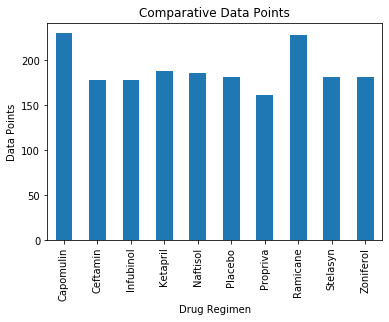

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# How many data points per drug regimen are there
DRdatapoints = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
#Create bar chart for above distribution
DRdatapoints.plot(kind="bar") 

#Make it pretty
plt.title("Comparative Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()
plt.tight_layout

In [14]:
DRdatapoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

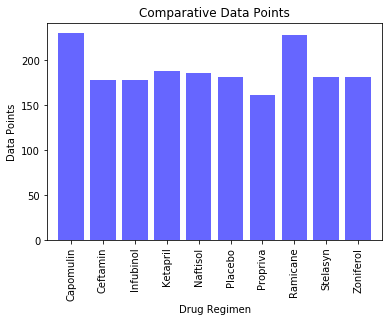

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using MatPlotLib

#Create your array
points = [230,178,178,188,186,181,161,228,181,182]

#Set x-axis as length of list of drug regimen
x_axis = np.arange(len(DRdatapoints))

#Create bar chart
plt.bar(x_axis, points, color = 'b', alpha = 0.6, align = "center")

# Rename tickmarks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol", "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"], rotation = "vertical")

plt.title("Comparative Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.show()

# Generate a bar plot showing number of data points for each treatment regimen using pyplot

## Pie plots

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendergrouped = combined_df.groupby(["Mouse ID","Sex"])


gender_df = pd.DataFrame(gendergrouped.size())
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender

,Total Count
Sex,
Female,124
Male,125


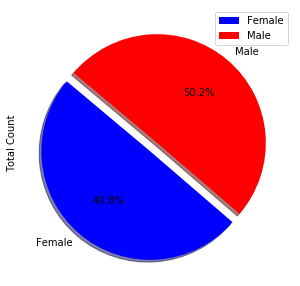

In [43]:
colors = ["blue","red"]
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y = "Total Count", figsize=(5,5), colors = colors, startangle = 140, explode = explode, shadow = True, autopct ="%1.1f%%")

(-1.1254402725649653,
 1.1762377096492673,
 -1.1249947090828347,
 1.1903054119887595)

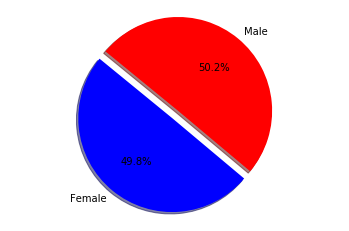

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male","Female"]
sizes = [50.2, 49.8]
colors = ["red","blue"]
explode = (0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow =True, startangle=-40)

plt.axis("equal")

## Quartiles, outliers and boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 

topbest = combined_df[combined_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
topbest=topbest.sort_values(["Timepoint"], ascending = True)
topbest_org = topbest[["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]]
topbest_org


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


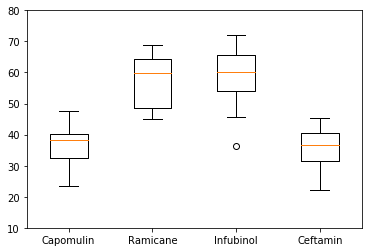

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

sortedtopbest = topbest_org.groupby(["Drug Regimen","Mouse ID"]).last()["Tumor Volume (mm3)"]
best_df = sortedtopbest.to_frame()

top4 = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
sortedfinal = best_df.reset_index()
tumor_lists = sortedfinal.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_lists_df = pd.DataFrame(tumor_lists)
tumor_lists_df.reindex(top4)
tumor_volume = [vol for vol in tumor_lists_df["Tumor Volume (mm3)"]]

plt.boxplot(tumor_volume, labels = top4)
plt.ylim(10,80)
plt.show()

## Line and scatter plots

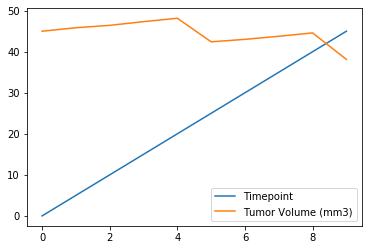

In [78]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

TimevTumor = combined_df[combined_df["Mouse ID"].isin(["j119"])]
timetumorinfo = TimevTumor[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

lineplot_df =timetumorinfo.reset_index()
lineplot_df = lineplot_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
graphlines = lineplot_df.plot.line()

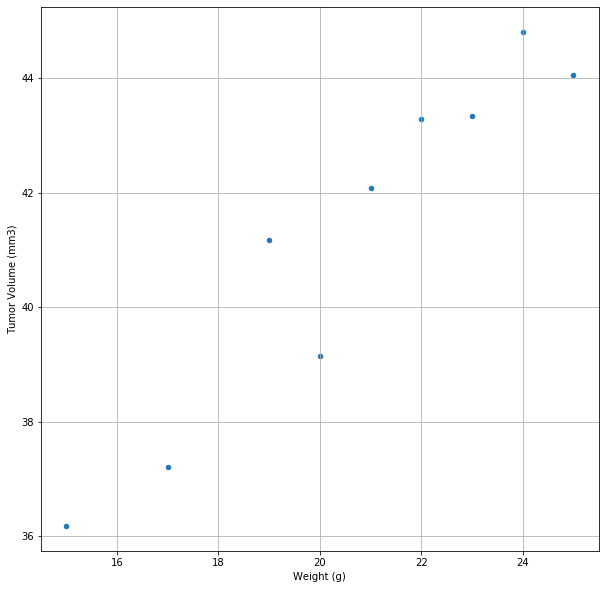

In [100]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_scatter = combined_df[combined_df["Drug Regimen"].isin(["Capomulin"])]
cap_scatter_df = topbest[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_sort = cap_scatter_df.sort_values(["Weight (g)"], ascending = True)
cap_scatter_plot = cap_scatter.reset_index()
cap_grouped_weight = cap_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
cap_group_plot = pd.DataFrame(cap_grouped_weight).reset_index()

cap_scatter = cap_group_plot.plot(kind = "scatter", x ="Weight (g)", y = "Tumor Volume (mm3)", grid = True, figsize = (10,10))

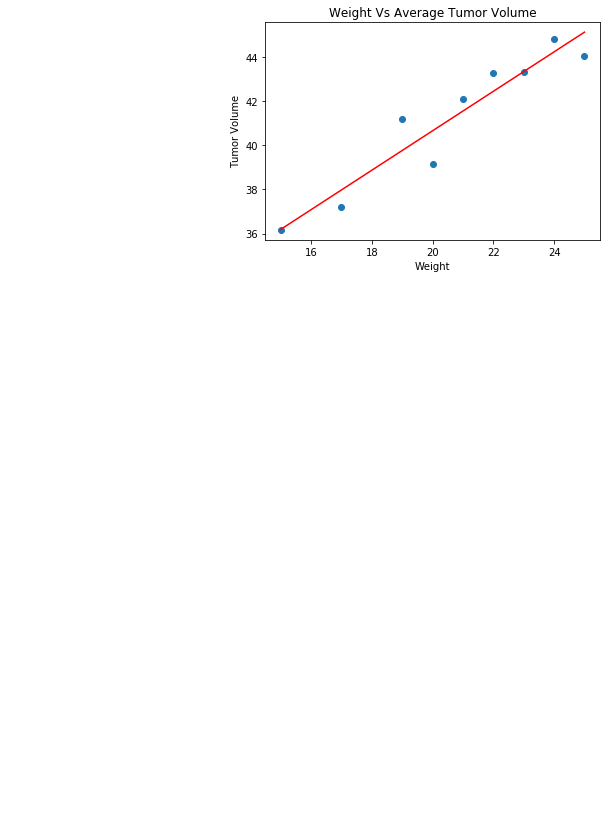

In [108]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = cap_group_plot["Weight (g)"]
y_values = cap_group_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line, (6,10), fontsize = 12, color = "red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs Average Tumor Volume")
plt.show()